In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [9]:
data['CarName'].value_counts()

toyota corona                     6
peugeot 504                       6
toyota corolla                    6
subaru dl                         4
mitsubishi g4                     3
                                 ..
mitsubishi montero                1
plymouth satellite custom (sw)    1
maxda rx3                         1
peugeot 304                       1
bmw x4                            1
Name: CarName, Length: 147, dtype: int64

In [10]:
data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [6]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [12]:
data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [13]:
data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [14]:
data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

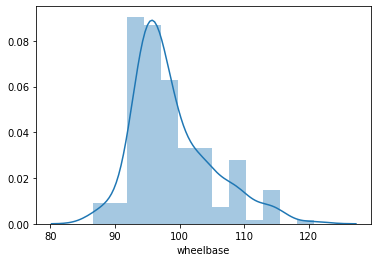

In [16]:
sns.distplot(data['wheelbase'])
plt.show()

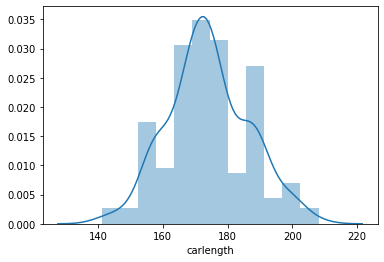

In [19]:
sns.distplot(data['carlength'])
plt.show()

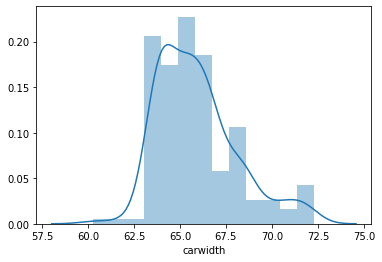

In [20]:
sns.distplot(data['carwidth'])
plt.show()

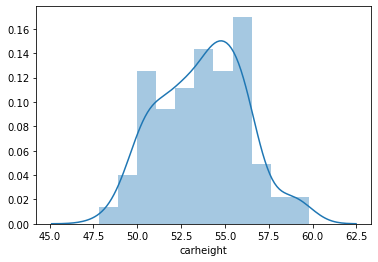

In [21]:
sns.distplot(data['carheight'])
plt.show()

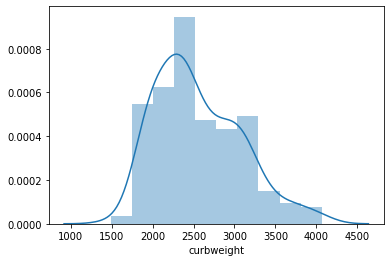

In [17]:
sns.distplot(data['curbweight'])
plt.show()

In [22]:
data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [23]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

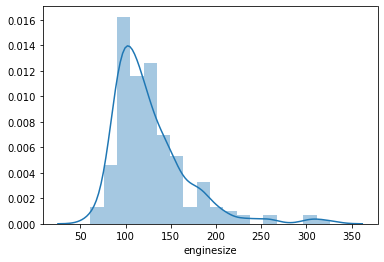

In [25]:
sns.distplot(data['enginesize'])
plt.show()

In [26]:
data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

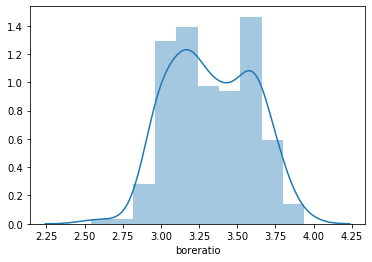

In [27]:
sns.distplot(data['boreratio'])
plt.show()

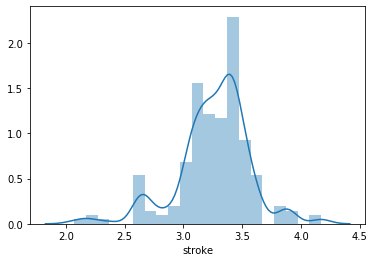

In [28]:
sns.distplot(data['stroke'])
plt.show()

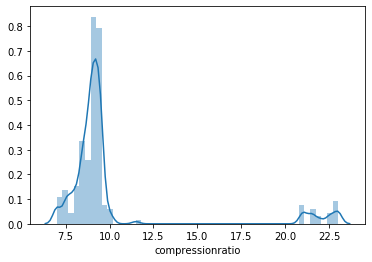

In [29]:
sns.distplot(data['compressionratio'])
plt.show()

In [ ]:
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64

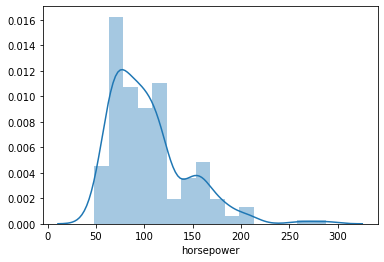

In [30]:
sns.distplot(data['horsepower'])
plt.show()

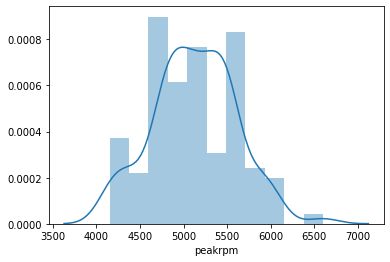

In [31]:
sns.distplot(data['peakrpm'])
plt.show()

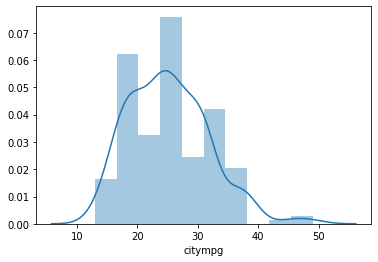

In [32]:
sns.distplot(data['citympg'])
plt.show()

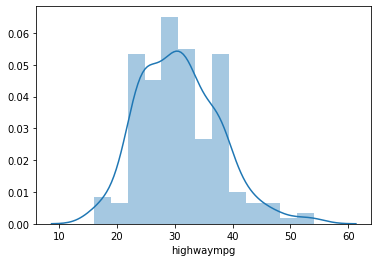

In [33]:
sns.distplot(data['highwaympg'])
plt.show()

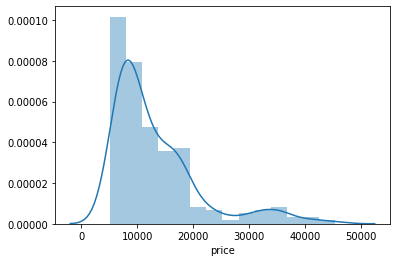

In [34]:
sns.distplot(data['price'])
plt.show()

In [36]:
numeric_data=data.select_dtypes(include=['float64','int64'])
numeric_data.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [37]:
#we'll be treating 'symboling' as categorical as it can take only 6 values
numeric_data = numeric_data.drop(['symboling', 'car_ID'], axis=1)

<Figure size 1440x720 with 0 Axes>

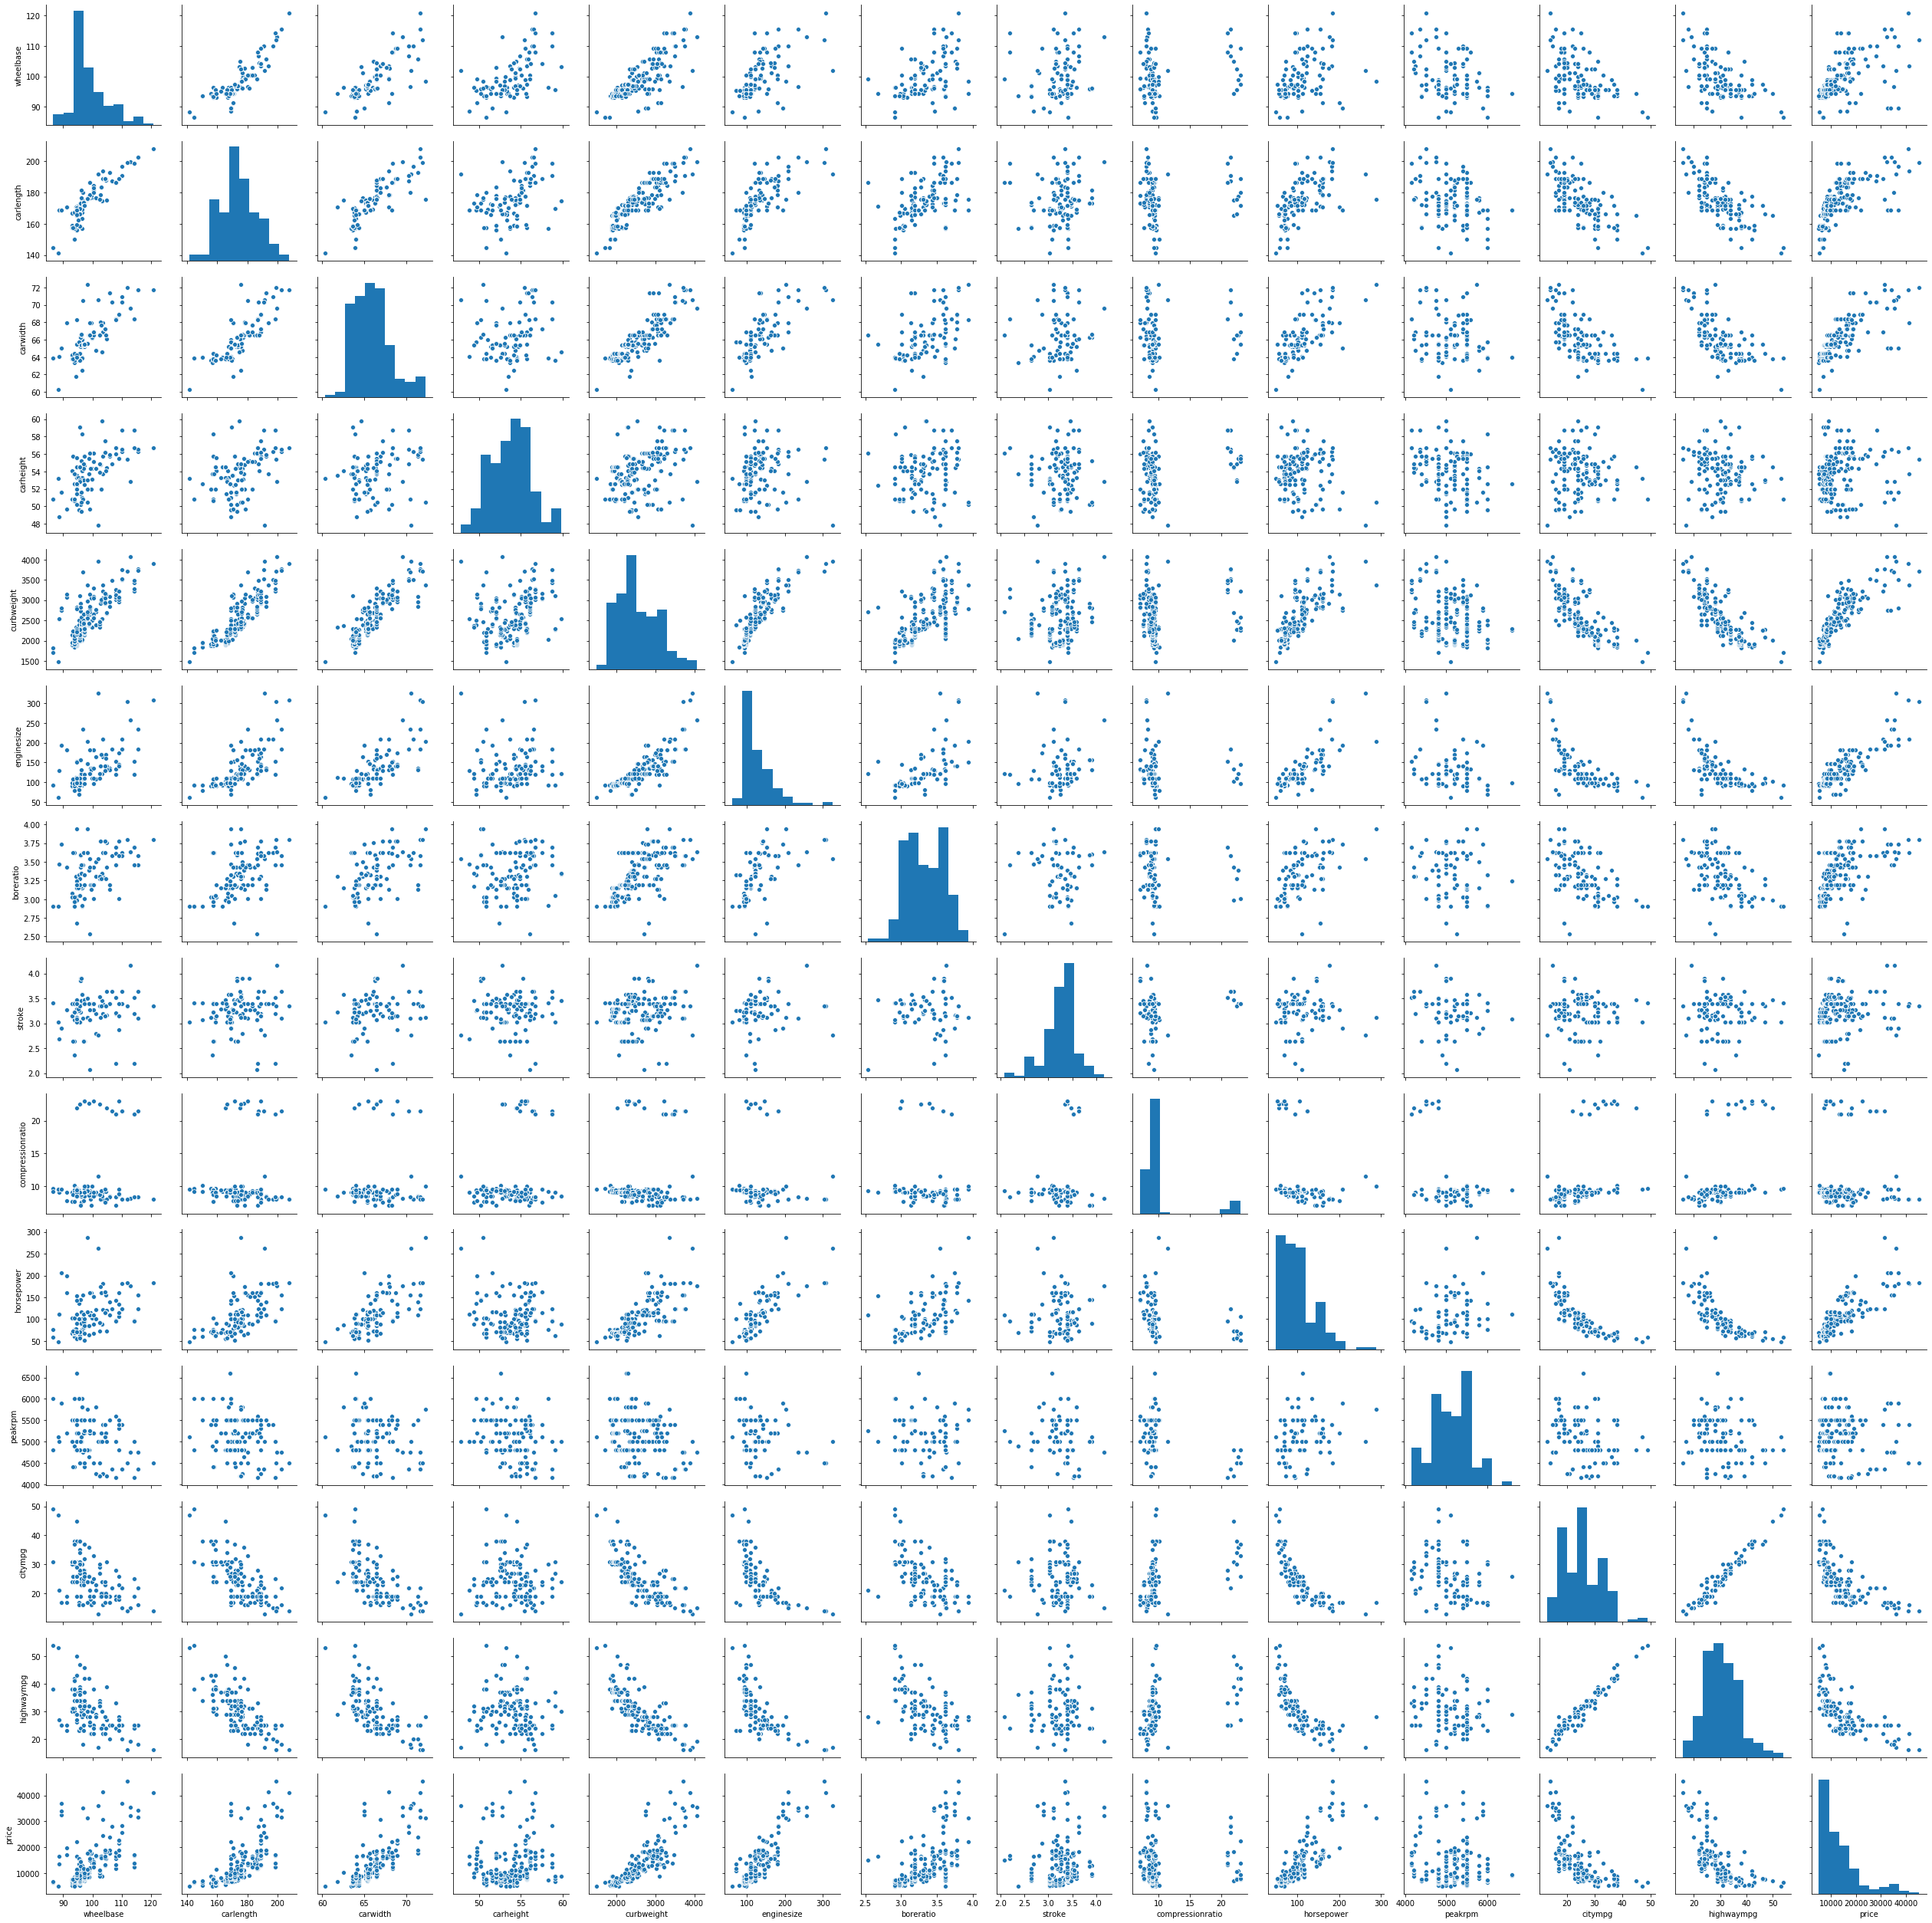

In [38]:
# Pairwise scatter plots
plt.figure(figsize=(20, 10))
sns.pairplot(numeric_data)
plt.show()

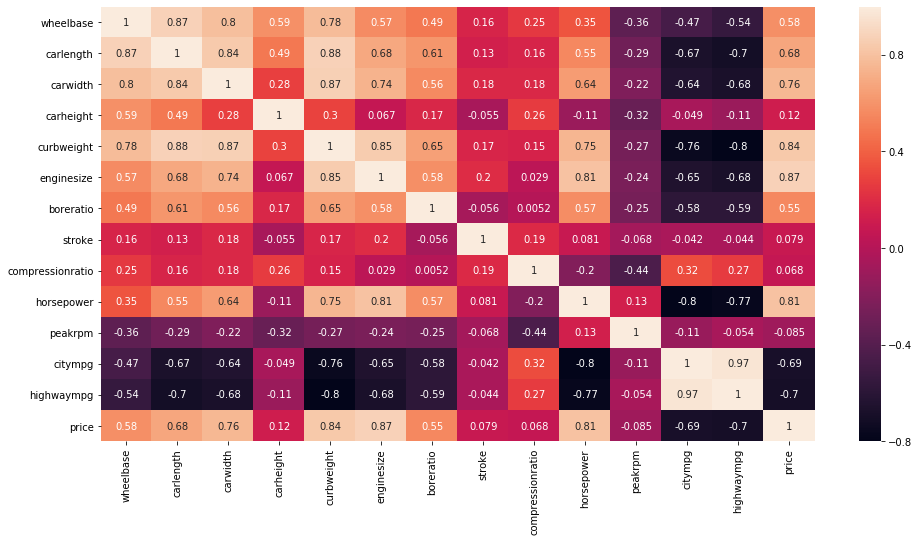

In [56]:
#correlation matrix
correlation = numeric_data.corr()
plt.figure(figsize=(16,8))
ax=sns.heatmap(correlation, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [57]:
data['symboling'] = data['symboling'].astype('object')

In [61]:
data['car_company']=data['CarName'].apply(lambda x: x.split(" ")[0])

In [62]:
data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
toyouta         1
vokswagen       1
Nissan          1
porcshce        1
Name: car_company, dtype: int64

In [63]:
# replacing misspelled car_company names
data.loc[(data['car_company'] == "vw") | (data['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'
data.loc[data['car_company'] == "porcshce", 'car_company'] = 'porsche'
data.loc[data['car_company'] == "toyouta", 'car_company'] = 'toyota'
data.loc[data['car_company'] == "Nissan", 'car_company'] = 'nissan'
data.loc[data['car_company'] == "maxda", 'car_company'] = 'mazda'

In [64]:
data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [65]:
data = data.drop('CarName', axis=1)

In [66]:
data.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [68]:
#splitting the dataset
x = data.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation',
                  'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
                  'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 
                  'citympg', 'highwaympg','car_company']]
y = data['price']


In [70]:
categoricals=x.select_dtypes(include=['object'])
dummies = pd.get_dummies(categoricals, drop_first=True)
x = x.drop(list(categoricals.columns), axis=1)
x = pd.concat([x, dummies], axis=1)

In [72]:
# scaling the features
from sklearn.preprocessing import scale
#column names are lost after scaling (the dataframe is converted to a numpy array)
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [79]:
x_train.shape

(153, 68)

In [80]:
x_test.shape

(52, 68)

In [175]:
classifier = LinearRegression()
classifier.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
predicted=classifier.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=predicted))

0.8952651916732526


In [189]:
# RFE(Recursive Feature Elimination) with 15 features
from sklearn.feature_selection import RFE
classifier = LinearRegression()
classifier2 = RFE(classifier, 15)

# fit with 15 features
classifier2.fit(x_train, y_train)

# Printing the boolean results
print(classifier2.support_)           
print(classifier2.ranking_)  

[False False  True False  True  True  True False False False  True False
 False False False False False False False  True False False  True  True
  True False False  True False False False False False  True False False
 False False False False  True False False False False False False False
  True  True False False False False False False False False False False
 False  True False False False False False False]
[23 22  1 25  1  1  1 41 31 30  1 46 20 45 50 44 34 29 33  1 40  4  1  1
  1 19 17  1 28 24 38 51  3  1 15 37 26 52 27  7  1 49 32 54  2 48 47 42
  1  1 21 10 14 35 43 12 36  5 11  6  9  1 16 53 18  8 13 39]


In [190]:
predicted=classifier2.predict(x_test)

In [191]:
print(r2_score(y_test, predicted))

0.873034605948203


In [193]:
# RFE(Recursive Feature Elimination) with 7 features
classifierr = LinearRegression()
classifier3 = RFE(classifierr, 7)

# fit with 7 features
classifier3.fit(x_train, y_train)

# Printing the boolean results
print(classifier3.support_)           
print(classifier3.ranking_)  

[False False  True False  True  True False False False False  True False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False False False False False False
 False False False False False False False False]
[31 30  1 33  1  1  7 49 39 38  1 54 28 53 58 52 42 37 41  8 48 12  3  4
  2 27 25  1 36 32 46 59 11  6 23 45 34 60 35 15  9 57 40 62 10 56 55 50
  1  1 29 18 22 43 51 20 44 13 19 14 17  5 24 61 26 16 21 47]


In [194]:
predicted=classifier3.predict(x_test)
print(r2_score(y_test, predicted))

0.8824989874004436


In [200]:
# import statsmodels
import statsmodels.api as sm  
col_15 = x_train.columns[classifier2.support_]
x_train_n = x_train[col_15]
# add a constant to the model
x_train_n = sm.add_constant(x_train_n)
x_train_n.head()

,const,carwidth,curbweight,enginesize,boreratio,peakrpm,aspiration_turbo,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_rear,enginetype_rotor,fuelsystem_2bbl,car_company_bmw,car_company_buick,car_company_porsche
90,1.0,-0.984972,-1.036883,-0.575511,-1.257507,-0.683286,-0.469295,-0.720082,1.065559,-0.372678,-0.121867,-0.141069,-0.689072,-0.201517,-0.201517,-0.158114
173,1.0,0.276731,-0.441975,-0.118132,-0.073121,-1.944265,-0.469295,-0.720082,1.065559,-0.372678,-0.121867,-0.141069,-0.689072,-0.201517,-0.201517,-0.158114
93,1.0,-0.984972,-1.023406,-0.719947,-0.665314,0.157366,-0.469295,-0.720082,-0.938474,2.683282,-0.121867,-0.141069,1.451227,-0.201517,-0.201517,-0.158114
5,1.0,0.183272,-0.093502,0.218885,-0.517266,0.787855,-0.469295,-0.720082,1.065559,-0.372678,-0.121867,-0.141069,-0.689072,-0.201517,-0.201517,-0.158114
167,1.0,-0.143836,-0.029968,0.459611,1.074252,-0.683286,-0.469295,-0.720082,-0.938474,-0.372678,-0.121867,-0.141069,-0.689072,-0.201517,-0.201517,-0.158114


In [201]:
# fitting the model with 15 variables
classifier4 = sm.OLS(y_train, x_train_n).fit()   
print(classifier4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.16e-80
Time:                        08:16:24   Log-Likelihood:                -1362.0
No. Observations:                 153   AIC:                             2756.
Df Residuals:                     137   BIC:                             2804.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.32e+04    

In [202]:
x_test_n = x_test[col_15]
x_test_n = sm.add_constant(x_test_n, has_constant='add')
x_test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 15 to 178
Data columns (total 16 columns):
const                  52 non-null float64
carwidth               52 non-null float64
curbweight             52 non-null float64
enginesize             52 non-null float64
boreratio              52 non-null float64
peakrpm                52 non-null float64
aspiration_turbo       52 non-null float64
carbody_hatchback      52 non-null float64
carbody_sedan          52 non-null float64
carbody_wagon          52 non-null float64
enginelocation_rear    52 non-null float64
enginetype_rotor       52 non-null float64
fuelsystem_2bbl        52 non-null float64
car_company_bmw        52 non-null float64
car_company_buick      52 non-null float64
car_company_porsche    52 non-null float64
dtypes: float64(16)
memory usage: 6.9 KB


In [203]:
predicted=classifier4.predict(x_test_n)
print(r2_score(y_test, predicted))

0.8730346059482026


In [204]:
col_7 = x_train.columns[classifier3.support_]
x_train_n = x_train[col_7]
# add a constant to the model
x_train_n = sm.add_constant(x_train_n)
classifier4 = sm.OLS(y_train, x_train_n).fit()   
print(classifier4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     260.0
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.00e-78
Time:                        08:17:30   Log-Likelihood:                -1390.4
No. Observations:                 153   AIC:                             2797.
Df Residuals:                     145   BIC:                             2821.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.325e+04    

In [205]:
x_test_n = x_test[col_7]
x_test_n = sm.add_constant(x_test_n, has_constant='add')
x_test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 15 to 178
Data columns (total 8 columns):
const                  52 non-null float64
carwidth               52 non-null float64
curbweight             52 non-null float64
enginesize             52 non-null float64
peakrpm                52 non-null float64
enginelocation_rear    52 non-null float64
car_company_bmw        52 non-null float64
car_company_buick      52 non-null float64
dtypes: float64(8)
memory usage: 3.7 KB


In [206]:
predicted=classifier4.predict(x_test_n)
print(r2_score(y_test, predicted))

0.8824989874004435


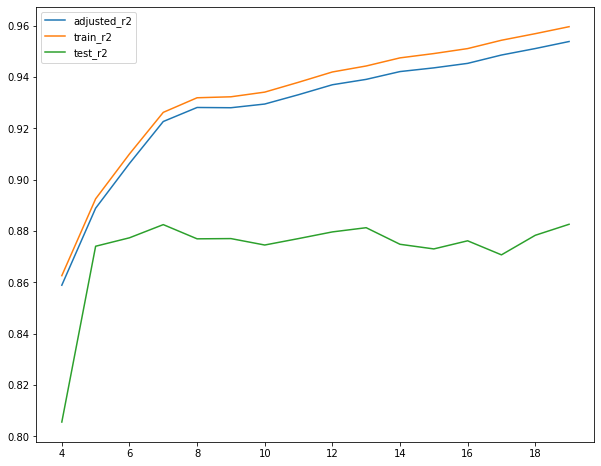

In [207]:
n_features = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for k in range(4, 20):
    classifier = LinearRegression()
    classifier = RFE(classifier, k)
    classifier.fit(x_train, y_train)
    col_n = x_train.columns[classifier.support_]
    x_train_n = x_train[col_n]
    # add a constant to the model
    x_train_n = sm.add_constant(x_train_n)
    classifier = sm.OLS(y_train, x_train_n).fit()
    adjusted_r2.append(classifier.rsquared_adj)
    r2.append(classifier.rsquared)
    x_test_n = x_test[col_n]
    x_test_n = sm.add_constant(x_test_n, has_constant='add')
    predicted = classifier.predict(x_test_n)
    test_r2.append(r2_score(y_test, predicted))

plt.figure(figsize=(10, 8))
plt.plot(n_features, adjusted_r2, label="adjusted_r2")
plt.plot(n_features, r2, label="train_r2")
plt.plot(n_features, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [208]:
classifier = LinearRegression()
classifier = RFE(classifier, 7)
classifier.fit(x_train, y_train)
col_7 = x_train.columns[classifier.support_]
x_train_n = x_train[col_7]
# add a constant to the model
x_train_n = sm.add_constant(x_train_n)
classifier = sm.OLS(y_train, x_train_n).fit()
print(classifier.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     260.0
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.00e-78
Time:                        08:18:11   Log-Likelihood:                -1390.4
No. Observations:                 153   AIC:                             2797.
Df Residuals:                     145   BIC:                             2821.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.325e+04    

In [209]:
x_test_n = x_test[col_7]
x_test_n = sm.add_constant(x_test_n, has_constant='add')
x_test_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 15 to 178
Data columns (total 8 columns):
const                  52 non-null float64
carwidth               52 non-null float64
curbweight             52 non-null float64
enginesize             52 non-null float64
peakrpm                52 non-null float64
enginelocation_rear    52 non-null float64
car_company_bmw        52 non-null float64
car_company_buick      52 non-null float64
dtypes: float64(8)
memory usage: 3.7 KB


In [210]:
predicted=classifier.predict(x_test_n)
print(r2_score(y_test, predicted))

0.8824989874004435


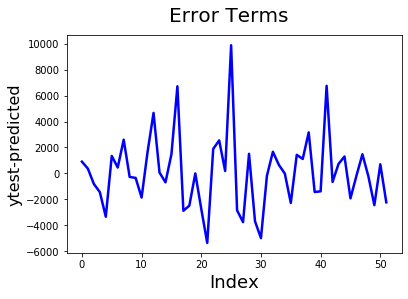

In [155]:
# Error terms
c = [i for i in range(len(predicted))]
fig = plt.figure()
plt.plot(c,y_test-predicted, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)              
plt.ylabel('ytest-predicted', fontsize=16)         
plt.show()

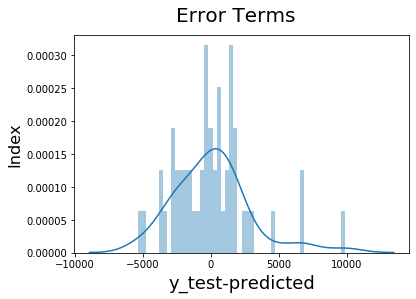

In [156]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-predicted),bins=50)
fig.suptitle('Error Terms', fontsize=20)                   
plt.xlabel('y_test-predicted', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

In [157]:
np.mean(y_test-predicted)

88.81061425222373

In [211]:
np.mean(y_test)

13010.012826923077

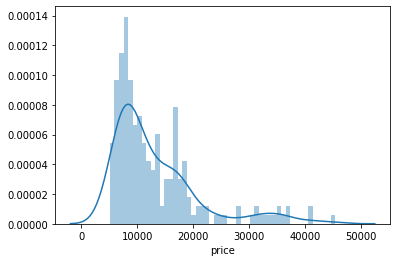

In [158]:
sns.distplot(data['price'],bins=50)
plt.show()

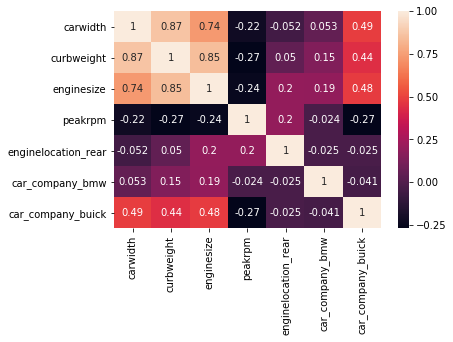

In [171]:
# multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 'peakrpm',
       'enginelocation_rear', 'car_company_bmw', 'car_company_buick']
correlation = x.loc[:, list(predictors)].corr()
ax=sns.heatmap(correlation, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [172]:
#FINAL MODEL
X_train=x_train[[ 'curbweight', 'enginesize', 'peakrpm','enginelocation_rear', 'car_company_bmw', 'car_company_buick']]
X_test=x_test[[ 'curbweight', 'enginesize', 'peakrpm','enginelocation_rear', 'car_company_bmw', 'car_company_buick']]

In [173]:
classifier = LinearRegression()
classifier.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
predicted=classifier.predict(X_test)
print(r2_score(y_test, predicted))

0.8832448137298814
